In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.colors import ListedColormap

from sklearn import manifold
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD

from time import time

In [2]:
x = np.genfromtxt('GBM9.txt')
X = x[1:,1:].T

In [3]:
# assign individual cells to three different tumors
name = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]

PCA: 0.23 sec
SparsePCA: 28 sec
t-SNE: 1.8 sec
TruncatedSVD: 0.62 sec
MDS: 0.15 sec
SpectralEmbedding: 1.6 sec


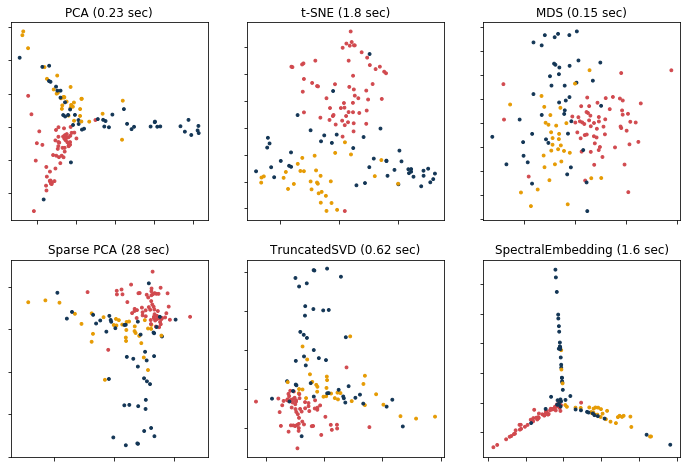

In [4]:
# label the plots by different tumors
cMap = ['white', (230/255,155/255,3/255), (209/255,73/255,78/255), (18/255,53/255,85/255)]
color = []
for i in name:
    color.append(cMap[i])

# compare manifold learning methods
n_neighbors = 6
n_components = 2

fig = plt.figure(figsize=(12, 8))

# method 1: classical PCA
t0 = time()
pca = PCA(n_components=n_components, svd_solver='arpack')
Y = pca.fit_transform(X)
t1 = time()
print("PCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(231)
plt.scatter(Y[:, 0], Y[:, 1], c=color, s=8)
plt.title("PCA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# method 2: sparse PCA
t0 = time()
spca = SparsePCA(n_components=n_components)
Y = spca.fit_transform(X)
t1 = time()
print("SparsePCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(234)
plt.scatter(Y[:, 0], Y[:, 1], c=color, s=8)
plt.title("Sparse PCA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# method 3: t-SNE
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='random', random_state=0, perplexity=30, learning_rate=10)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(232)
plt.scatter(Y[:, 0], Y[:, 1], c=color, s=8)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# method 4: TruncatedSVD
t0 = time()
svd = TruncatedSVD(n_components=n_components)
Y = svd.fit_transform(X)
t1 = time()
print("TruncatedSVD: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(235)
plt.scatter(Y[:, 0], Y[:, 1], c=color, s=8)
plt.title("TruncatedSVD (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# method 5: metric MDS
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(233)
plt.scatter(Y[:, 0], Y[:, 1], c=color, s=8)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# method 6: SpectralEmbedding
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(236)
plt.scatter(Y[:, 0], Y[:, 1], c=color, s=8)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

PCA: 0.21 sec
MDS: 0.15 sec
t-SNE: 1.5 sec
TruncatedSVD: 0.61 sec
Isomap: 1.5 sec
standard: 2.6 sec
ltsa: 2.1 sec
hessian: 2.1 sec
modified: 2.4 sec
SpectralEmbedding: 1.6 sec


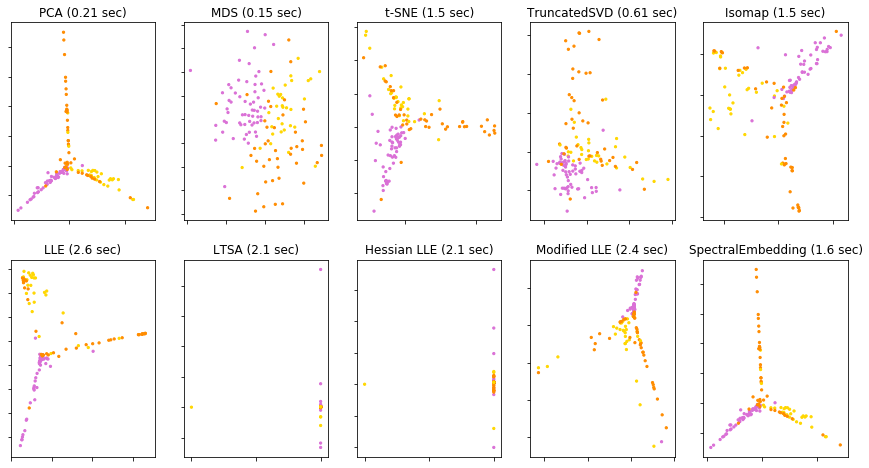

In [23]:
# other manifold learning methods that can be modified and added

# method 5: isomap
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(255)
plt.scatter(Y[:, 0], Y[:, 1], c=color, s=5)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# methods 6-9: LLE and modified LLE
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
    ax = fig.add_subplot(256 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, s=5)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

plt.show()